## Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.shape 

(37249, 2)

In [4]:
df.sample()['clean_comment'].values

array(['feels like are living 90s bollywood movies '], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [7]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [8]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(350)

In [11]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [15]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [16]:
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [17]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [18]:
df['clean_comment'] = df['clean_comment'].str.strip()
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [19]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]
comments_with_urls.head()

,clean_comment,category


In [20]:
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [21]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


In [22]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


## EDA

<Axes: xlabel='category', ylabel='count'>

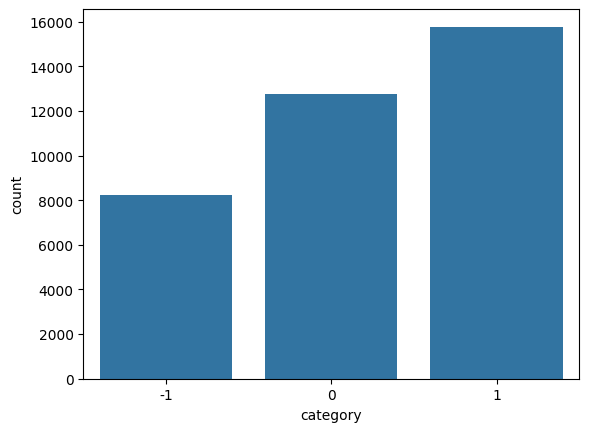

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x="category")

In [24]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [25]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [26]:
df.sample(5)

,clean_comment,category,word_count
34617,attacks muslim family gurugram house with rods...,-1,122
8185,interesting that bjp thinks that thirty one da...,1,70
5426,sono appena tornata fra monti dopo mesi lido j...,0,40
26530,you know bad when even government funded mouth...,-1,12
25668,reports saying bsp are ready support that alre...,-1,17


In [27]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

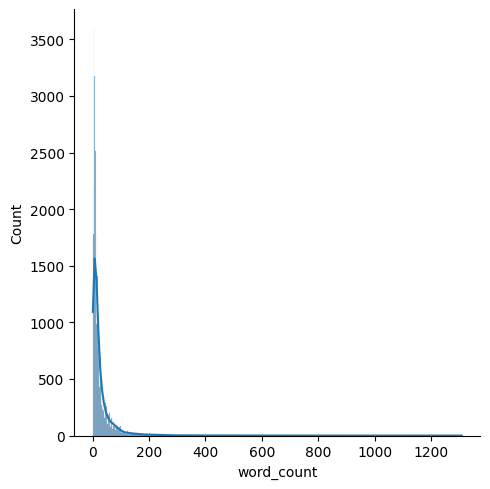

In [28]:
sns.displot(df['word_count'], kde=True)

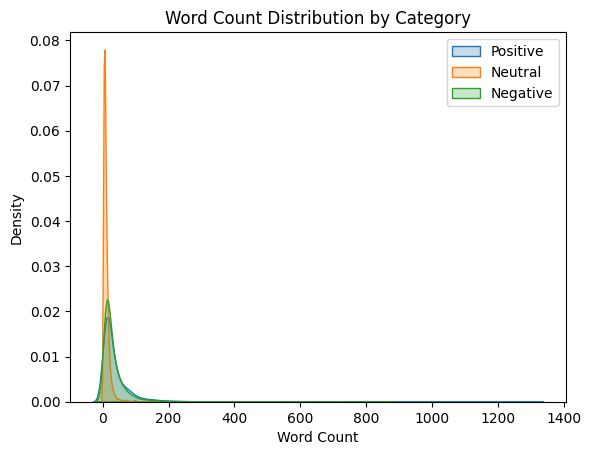

In [29]:
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

plt.legend()
plt.show()

<Axes: ylabel='word_count'>

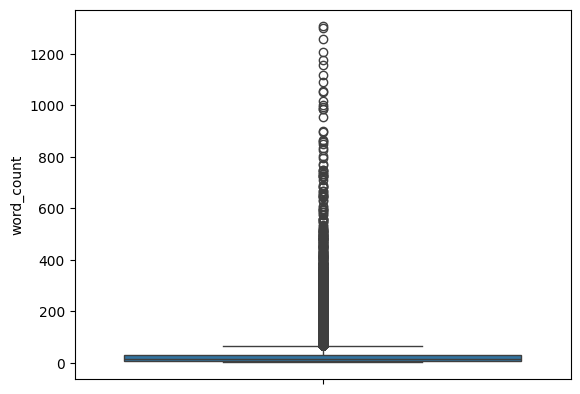

In [30]:
sns.boxplot(df['word_count'])

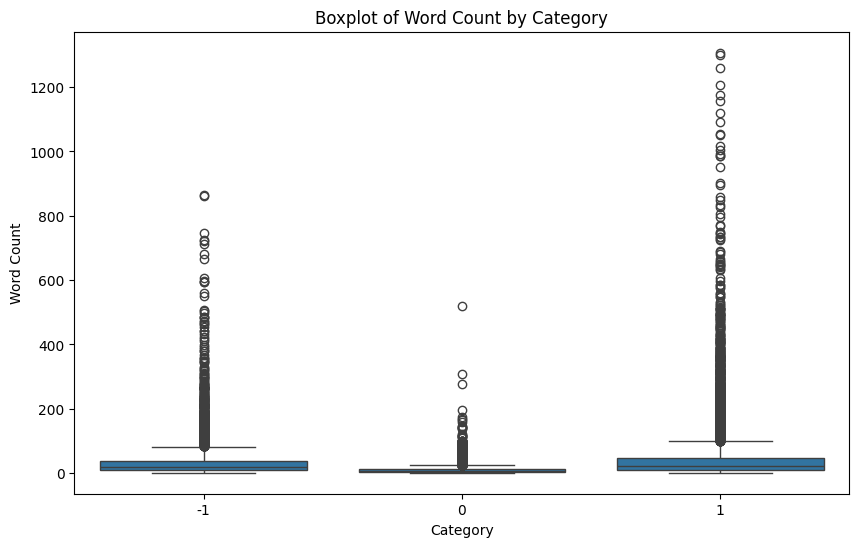

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

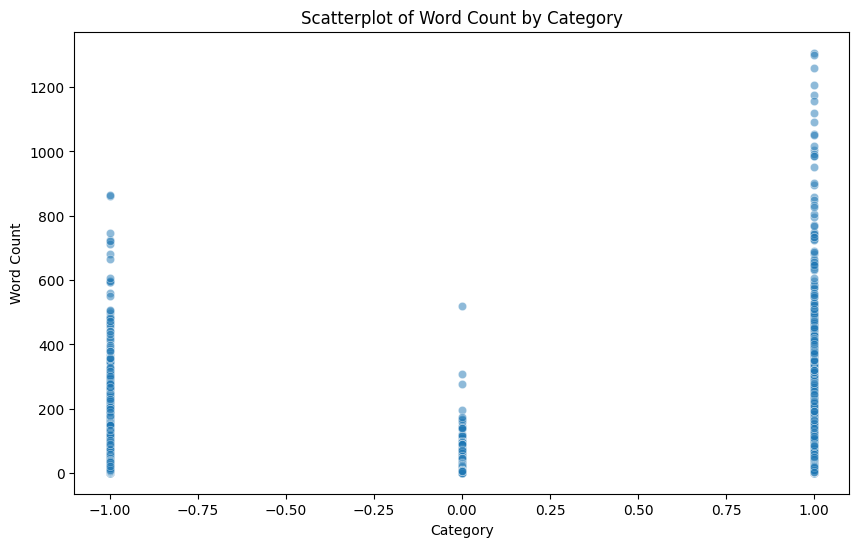

In [32]:
# scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

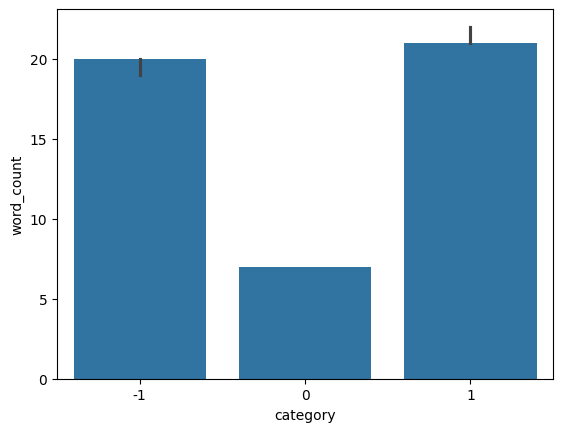

In [33]:
sns.barplot(df, x='category', y='word_count', estimator='median')

In [34]:
!pip install nltk

In [35]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words])) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
3240,dude the problem common folks eyes legitimizes...,1,47,18
25557,pakistani admire india progress over these pas...,-1,21,7
13918,achuthanandan wanted make cochin metro but man...,0,38,13
12966,and why yogi pic there did say that,0,8,5
17801,how can bewda shastri see with his eyelids closed,-1,9,4


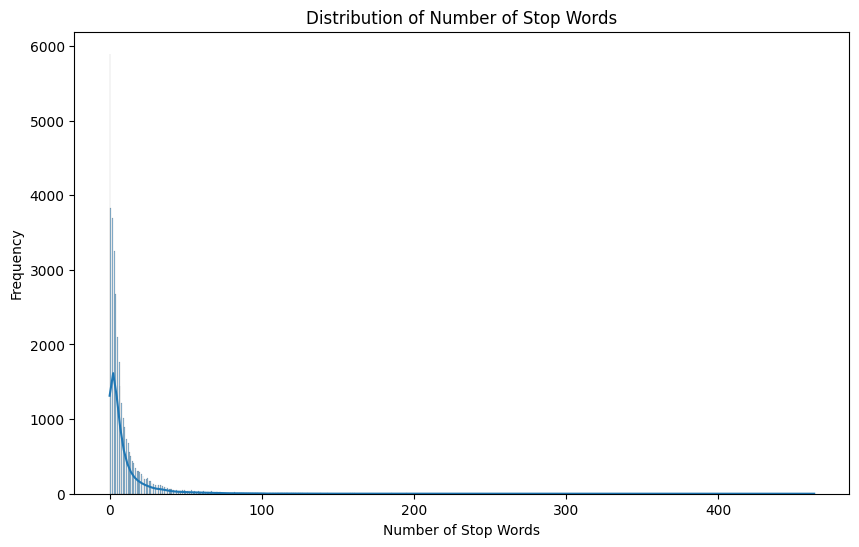

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Number of Stop Words')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

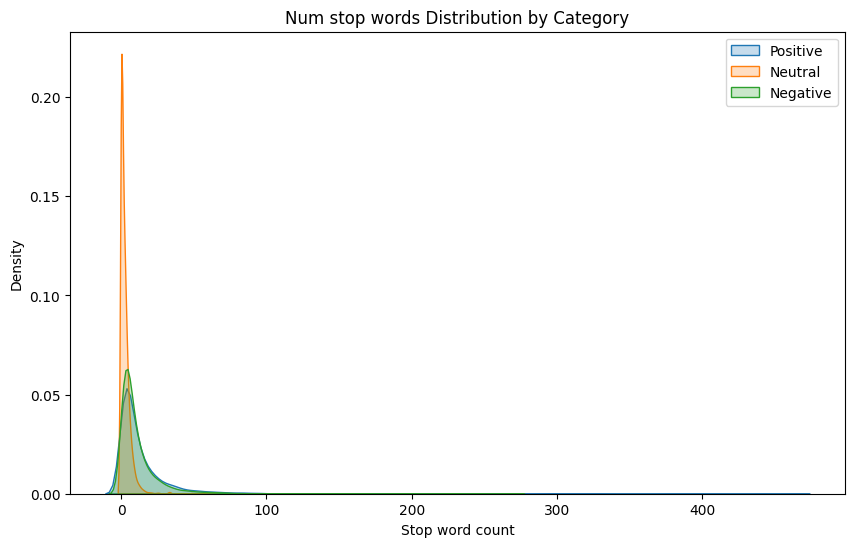

In [39]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

plt.legend()

<Axes: xlabel='category', ylabel='num_stop_words'>

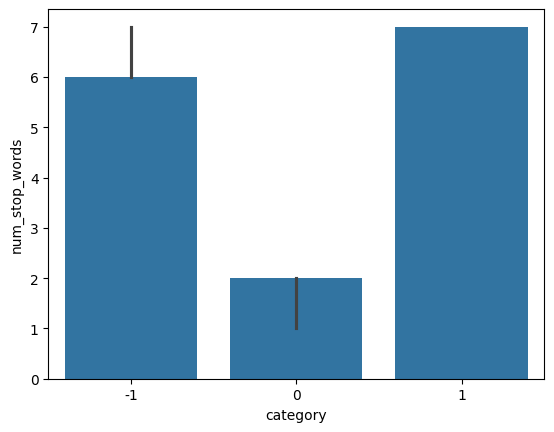

In [40]:
#median word counts among sentiments
sns.barplot(df, x='category', y='num_stop_words', estimator='median')

C:\Users\USER\AppData\Local\Temp\ipykernel_35188\3912642696.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_words', palette='viridis')


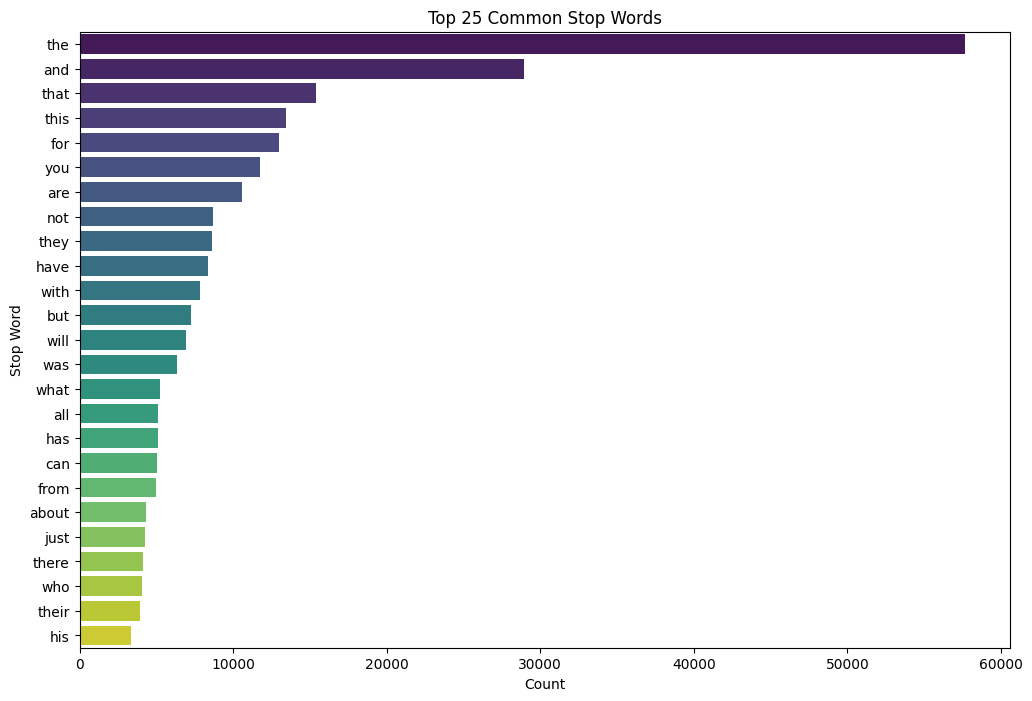

In [41]:
from collections import Counter

all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]
most_common_stop_words = Counter(all_stop_words).most_common(25)
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_words', 'count'])

plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_words', palette='viridis')
plt.title('Top 25 Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()